In [7]:
from google.colab import files
uploaded = files.upload()


Saving ecommerce_transactions.csv to ecommerce_transactions.csv


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_csv("ecommerce_transactions.csv")  # Replace with your actual file name
df.head()


,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
0,1,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023-04-14
1,2,Sophia Hall,59,India,Beauty,738.56,PayPal,2023-07-30
2,3,Elijah Thompson,26,France,Books,178.34,Credit Card,2023-09-17
3,4,Elijah White,43,Mexico,Sports,401.09,UPI,2023-06-21
4,5,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024-10-29


** STEP:2 -** **DATA EXPLORATION**


In [17]:
df.info()           # Data types and missing values
df.describe()       # Statistical summary
df['Country'].value_counts()  # Which countries are present
df['Product_Category'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    50000 non-null  int64  
 1   User_Name         50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   Country           50000 non-null  object 
 4   Product_Category  50000 non-null  object 
 5   Purchase_Amount   50000 non-null  float64
 6   Payment_Method    50000 non-null  object 
 7   Transaction_Date  50000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.1+ MB


array(['Clothing', 'Beauty', 'Books', 'Sports', 'Toys', 'Home & Kitchen',
       'Grocery', 'Electronics'], dtype=object)

**STEP:3 - DATA CLEANING**

1.convert dates

In [18]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])


2.Check duplicates

In [19]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


3.Missing value

In [20]:
df.isnull().sum()


,0
Transaction_ID,0
User_Name,0
Age,0
Country,0
Product_Category,0
Purchase_Amount,0
Payment_Method,0
Transaction_Date,0


**Step 4: Simple Analysis**

1.Which product category generates the highest total purchase amount?

In [21]:
df.groupby('Product_Category')['Purchase_Amount'].sum().sort_values(ascending=False)


,Purchase_Amount
Product_Category,
Sports,3195335.90
Toys,3185652.36
Books,3181897.30
Clothing,3171225.96
Electronics,3133965.04
Grocery,3123579.52
Home & Kitchen,3108945.78
Beauty,3057387.79


2.Which country spends the most?

In [22]:
df.groupby('Country')['Purchase_Amount'].sum().sort_values(ascending=False)


,Purchase_Amount
Country,
France,2545739.19
Canada,2544335.12
USA,2541220.22
Mexico,2534475.67
Australia,2514911.65
Brazil,2507287.54
India,2503542.71
Germany,2502442.20
Japan,2492312.20


3.What’s the average purchase amount by payment method?


In [23]:
df.groupby('Payment_Method')['Purchase_Amount'].mean()


,Purchase_Amount
Payment_Method,
Cash on Delivery,507.027434
Credit Card,499.464158
Debit Card,506.855321
Net Banking,497.126426
PayPal,505.882406
UPI,502.460263


4.How many transactions happen per year/month?

In [24]:
df['Year'] = df['Transaction_Date'].dt.year
df['Month'] = df['Transaction_Date'].dt.month_name()
df['Month'].value_counts()


,count
Month,
January,4271
October,4247
July,4246
December,4246
May,4234
August,4213
September,4169
November,4149
March,4139


STEP:5 - DATA VISUALIZATION

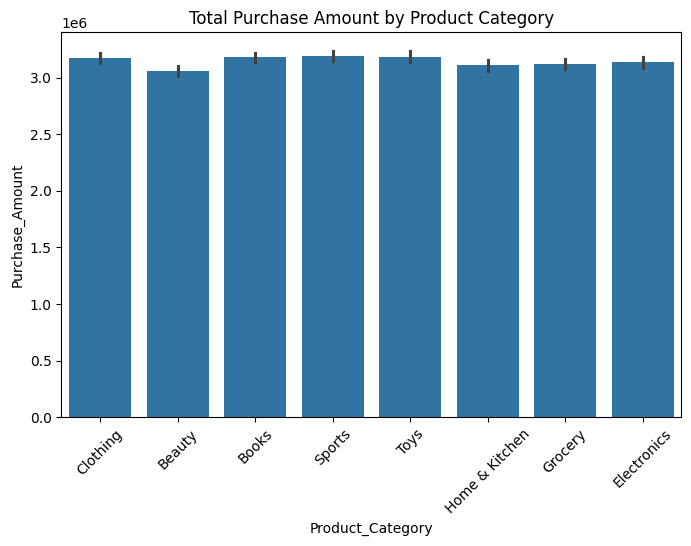

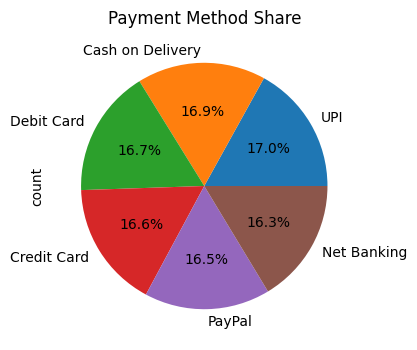

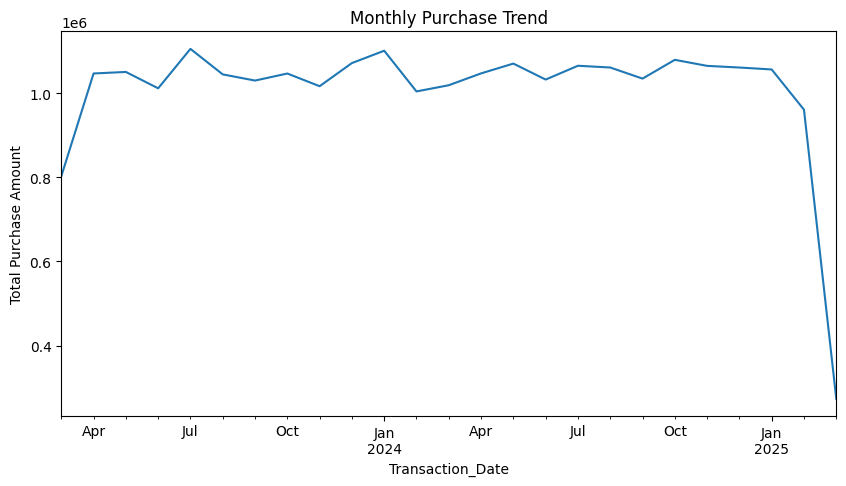

In [25]:
# 1. Purchase Amount by Product Category
plt.figure(figsize=(8,5))
sns.barplot(x='Product_Category', y='Purchase_Amount', data=df, estimator=sum)
plt.title('Total Purchase Amount by Product Category')
plt.xticks(rotation=45)
plt.show()

# 2. Payment Method Distribution
plt.figure(figsize=(6,4))
df['Payment_Method'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Method Share')
plt.show()

# 3. Monthly Sales Trend
monthly_sales = df.groupby(df['Transaction_Date'].dt.to_period('M'))['Purchase_Amount'].sum()
monthly_sales.plot(figsize=(10,5), title='Monthly Purchase Trend')
plt.ylabel('Total Purchase Amount')
plt.show()


**Step 6:** **Insights**

Home & Kitchen products generate the highest revenue.”

“UPI is the most used payment method.”

“Sales peak during the end of the year (Nov-Dec).”

